In [1]:
import torch

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch.nn as nn

In [3]:
X = torch.linspace(1, 50, 50).reshape(-1, 1)

In [4]:
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [5]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1),dtype=torch.float)

In [6]:
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

In [7]:
y = 2*X + 1 + e

In [8]:
y.shape

torch.Size([50, 1])

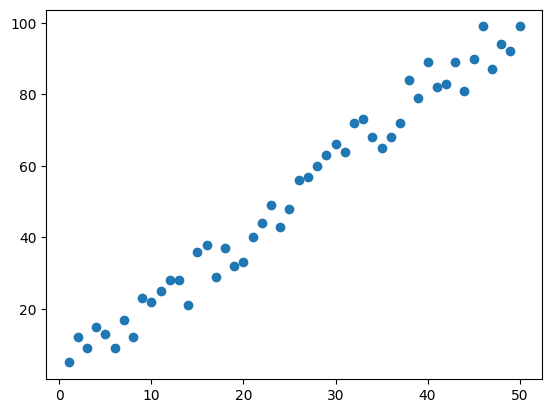

In [9]:
plt.scatter(X.numpy(), y.numpy())

In [10]:
torch.manual_seed(59)
model = nn.Linear(in_features=1, out_features=1)

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [11]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [12]:
torch.manual_seed(59)

model = Model(1,1)

print(model.linear.weight)
print(model.linear.bias)


Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [13]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [14]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<ViewBackward0>)


In [15]:
xq = np.linspace(0,50,50,dtype=float)

In [16]:
xq[0:10]

array([0.        , 1.02040816, 2.04081633, 3.06122449, 4.08163265,
       5.10204082, 6.12244898, 7.14285714, 8.16326531, 9.18367347])

In [17]:
w1 = 0.1059
b1 = 0.9637

y1 = w1 * xq * b1

In [18]:
y1

array([0.        , 0.1041386 , 0.2082772 , 0.31241581, 0.41655441,
       0.52069301, 0.62483161, 0.72897021, 0.83310882, 0.93724742,
       1.04138602, 1.14552462, 1.24966322, 1.35380183, 1.45794043,
       1.56207903, 1.66621763, 1.77035623, 1.87449484, 1.97863344,
       2.08277204, 2.18691064, 2.29104924, 2.39518785, 2.49932645,
       2.60346505, 2.70760365, 2.81174226, 2.91588086, 3.02001946,
       3.12415806, 3.22829666, 3.33243527, 3.43657387, 3.54071247,
       3.64485107, 3.74898967, 3.85312828, 3.95726688, 4.06140548,
       4.16554408, 4.26968268, 4.37382129, 4.47795989, 4.58209849,
       4.68623709, 4.79037569, 4.8945143 , 4.9986529 , 5.1027915 ])

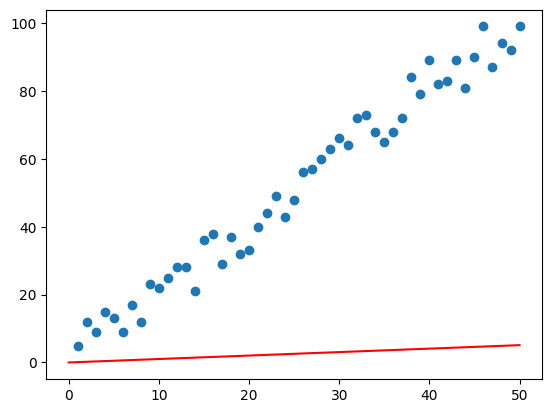

In [19]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(xq,y1,'r')

In [20]:
criterion = nn.MSELoss()

In [21]:
# SGD Mean Squared Error
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.001)

In [32]:
epochs = 50
losses = []

for i in range(epochs):
    i = i + 1
    # Predicting on the forward pass
    y_pred = model.forward(X)
    # Calculate our loss (error)
    loss = criterion(y_pred, y)
    # Record that error
    losses.append(loss)
    print(f"epoch {i} loss: {loss.item()} weight: {model.linear.weight.item()} bias: {model.linear.bias.item()}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 1 loss: 21.058000564575195 weight: 1.9838191270828247 bias: 1.0557515621185303
epoch 2 loss: 21.0574893951416 weight: 1.9837985038757324 bias: 1.0564652681350708
epoch 3 loss: 21.056978225708008 weight: 1.9837766885757446 bias: 1.0571786165237427
epoch 4 loss: 21.056468963623047 weight: 1.9837559461593628 bias: 1.057891607284546
epoch 5 loss: 21.055959701538086 weight: 1.9837344884872437 bias: 1.0586042404174805
epoch 6 loss: 21.055458068847656 weight: 1.9837136268615723 bias: 1.0593165159225464
epoch 7 loss: 21.054950714111328 weight: 1.9836921691894531 bias: 1.0600284337997437
epoch 8 loss: 21.054443359375 weight: 1.9836713075637817 bias: 1.0607401132583618
epoch 9 loss: 21.053936004638672 weight: 1.9836499691009521 bias: 1.0614514350891113
epoch 10 loss: 21.053434371948242 weight: 1.9836288690567017 bias: 1.0621623992919922
epoch 11 loss: 21.05292510986328 weight: 1.9836077690124512 bias: 1.0628730058670044
epoch 12 loss: 21.05242156982422 weight: 1.9835866689682007 bias: 1.06

In [29]:
losses_numpy = [loss.detach().numpy() for loss in losses]

Text(0.5, 0, 'Epoch')

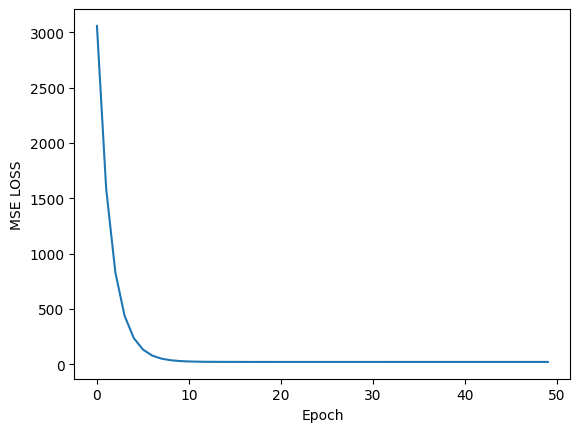

In [30]:
plt.plot(range(epochs),losses_numpy)
plt.ylabel('MSE LOSS')
plt.xlabel('Epoch')

In [34]:
x = np.linspace(0.0,50.0,50)
weight = model.linear.weight.item()
bias = model.linear.bias.item()

predicted_y = weight * x + bias

In [33]:
model.linear.weight.item()

1.982771635055542

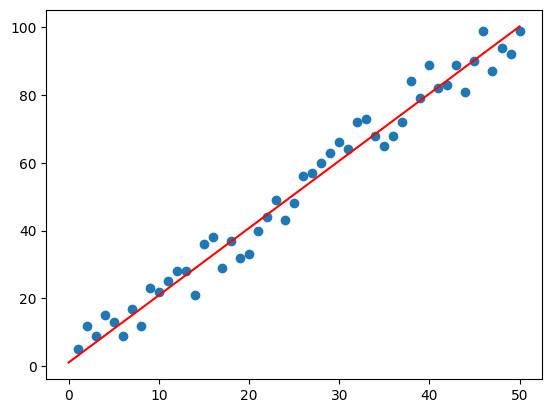

In [36]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x, predicted_y, 'r')